In [1]:
"""This notebook generates loss curves, 
latent traversals, and reconstructions for 1st round training"""
import numpy as np
import matplotlib.pyplot as plt
from dsprites import imshow, make_grid
import tensorflow as tf

import run_dsprites_models as dsvae
ds = dsvae.download_data()
EPOCHS = 100 #35
LATENT_DIM = 10
BATCH_SIZE = 32
TR_SIZE = 550_000 #500_000
#^these need to be the same as the run that produced the model weights

In [2]:
def display_model_random(model, x):
    '''displays a random set of original and reconstructed imgs
    :param model: a vae model to reconstruct from
    :param x: a numpy array representing the images
    '''
    z, *_= model.encode(x) # should return z (latents) and mean/logvar
    x_recon = tf.nn.sigmoid(model.decode(z)).numpy() # generate reconstructed images
    fig = plt.figure(figsize=(20, 20)) 
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    imshow(make_grid(x), title='Original', ax=ax1)
    imshow(make_grid(x_recon), title='Reconstructed', ax=ax2)
    fig.subplots_adjust(wspace=0.01)
    plt.show()
    
def plot_losses(losses):
    '''given an array of losses, plots'''
    plt.plot(losses)
    plt.title("Average epoch loss")
    plt.xlabel("Epoch")
    plt.ylabel("ELBO loss")
    plt.show()
    
def grab_img(set, num):
    '''grabs numth (0index) image from set'''
    return np.array([set[num]])


def step_latents(img, model, size=1, num_var=5):
    """varies each latent up and down by step size
    :param img: nparray of img (1,64,64,1)
    :param model: the model to encode with
    :param size:=1 the step size to vary latents
    :param num_var:=5 int) number of steps up (will automatically 
    do same num steps down)
    
    TODO: take a vector in order to vary the steps non uniformly
    
    :return tensor object of latent encodings for all step variations 
    of each latent (tf.Tensor([[...]...],shape=((num_var*2+1)*LATENT_DIM,LATENT_DIM),
     dtype=float32)
    """
    #x = ds.subset(size=1)
    z, *_ = model.encode(img)
    #print(z)
    z0 = tf.identity(z)
    #print(z0)
    array = [[0,0,0,0,0,0,0,0,0,0]]
    for apos in range(LATENT_DIM):
        array[0][apos] = 1
        zr = tf.identity(z0)
        for step in range(1,num_var+1,size):
            temp1 = [i*step for i in array[0]]
            tempn1 = [i*((-1)*step) for i in array[0]]
            #print([temp1])
            #print([tempn1])
            t1 = tf.add(z0,[temp1])
            tn1 = tf.add(z0,[tempn1])
            zr = tf.concat([tn1,zr,t1],0)
        array[0][apos] = 0
        if apos == 0:
            z = tf.identity(zr)
        else:
            z = tf.concat([z,zr],0)
    return z

def qual_latent_analysis(img, model, size=1, num_var=5):
    """varies each latent up and down by step size
    :param img: nparray of img (1,64,64,1)
    :param model: the model to encode with
    :param size:=1 the step size to vary latents
    :param num_var:=5 int) number of steps up (will automatically 
    do same num steps down)
    
    TODO: take a vector in order to vary the steps non uniformly
    
    :return displays graphic for visual analysis
    """
    z = step_latents(img, model, size, num_var)
    #print(z.shape)
    z_dis_recon = tf.nn.sigmoid(model.decode(z)).numpy()
    imshow(make_grid(z_dis_recon, nrow=num_var*2+1, pad_value=1))

In [3]:
# save vae models and txt file strings as variables
v = ["vae0.5_weights_100e_550ktr.h5","vae1_weights_100e_550ktr.h5",
    "vae2_weights_100e_550ktr.h5", "vae3_weights_100e_550ktr.h5",
    "vae4_weights_100e_550ktr.h5", "vae5_weights_100e_550ktr.h5",
    "vae6_weights_100e_550ktr.h5", "vae7_weights_100e_550ktr.h5",
    "vae8_weights_100e_550ktr.h5", "vae9_weights_100e_550ktr.h5",
     "vae10_weights_100e_550ktr.h5"]
vl = ["vae0.5_losses_100e_550ktr.txt","vae1_losses_100e_550ktr.txt",
    "vae2_losses_100e_550ktr.txt", "vae3_losses_100e_550ktr.txt",
    "vae4_losses_100e_550ktr.txt", "vae5_losses_100e_550ktr.txt",
    "vae6_losses_100e_550ktr.txt", "vae7_losses_100e_550ktr.txt",
    "vae8_losses_100e_550ktr.txt", "vae9_losses_100e_550ktr.txt",
    "vae10_losses_100e_550ktr.txt"]

In [73]:
#test = ds.subset(size=5) #take a subset of the images
test = np.load('test_imgs.npy')
# used stackoverflow to learn how to save and load np. data
# https://stackoverflow.com/questions/28439701/how-to-save-and-load-numpy-array-data-properly/55058828

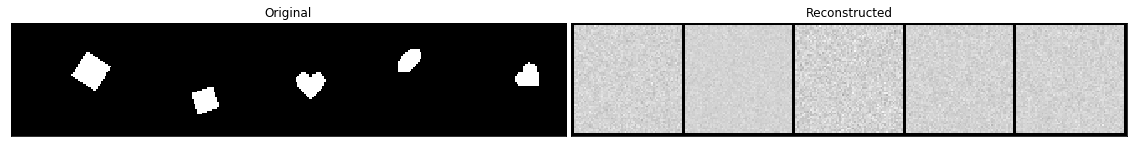

In [74]:
# blank
blankvae = dsvae.VAE(latent_dim=LATENT_DIM)
display_model_random(blankvae, test)

In [141]:
#print(type(test))
#print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [151]:
#np.save('test_imgs', test)
#np.save('test_x', x)
# https://stackoverflow.com/questions/52576617/how-to-save-numpy-4d-array-to-csv

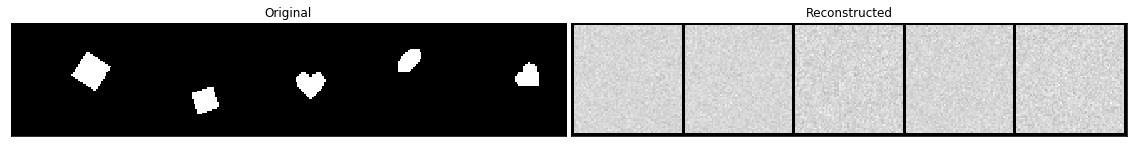

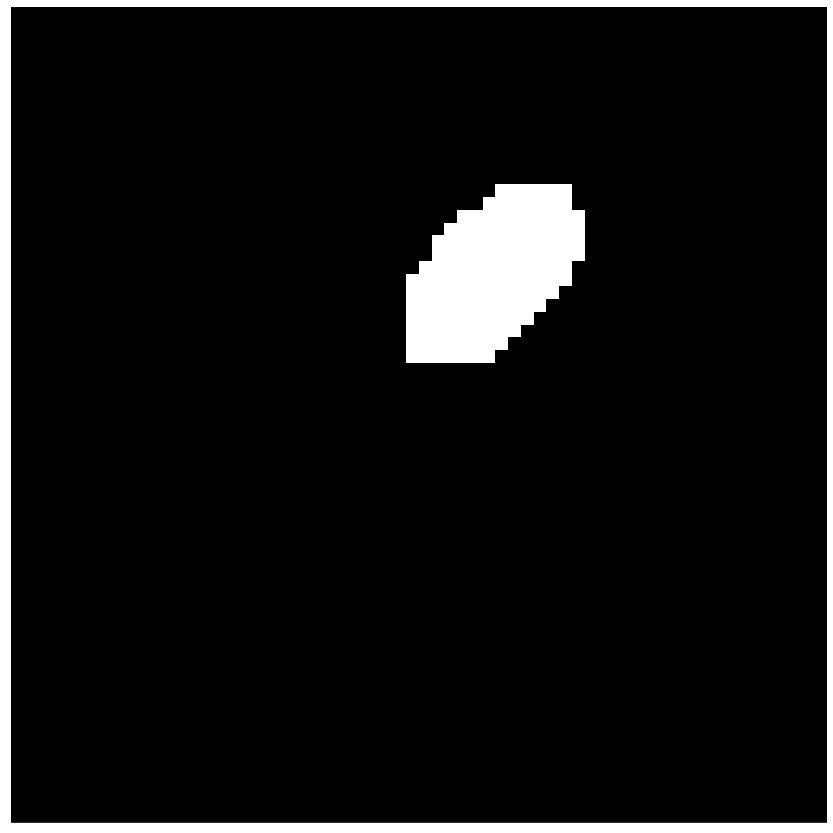

In [152]:
#test1=np.load('test_imgs.npy')
#x1=np.load('test_x.npy')
#display_model_random(blankvae, test1)
#imshow(make_grid(x1))

In [126]:
x = grab_img(test,3)

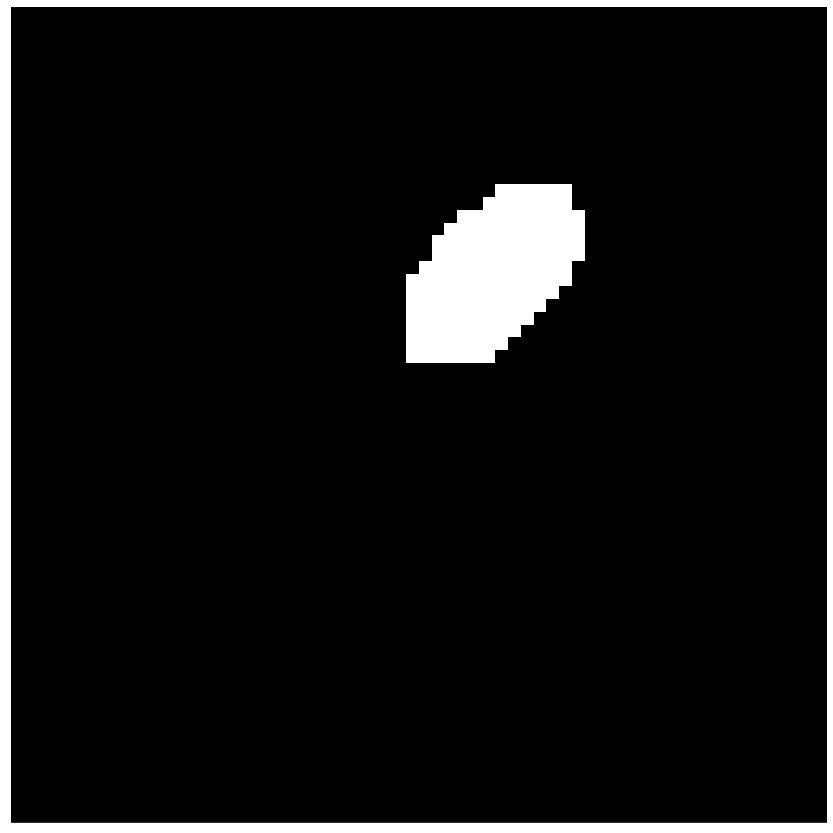

In [127]:
imshow(make_grid(x))

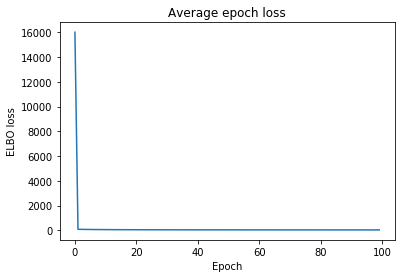

In [77]:
## vae b=0.5
l0 = np.loadtxt(vl[0])
plot_losses(l0)

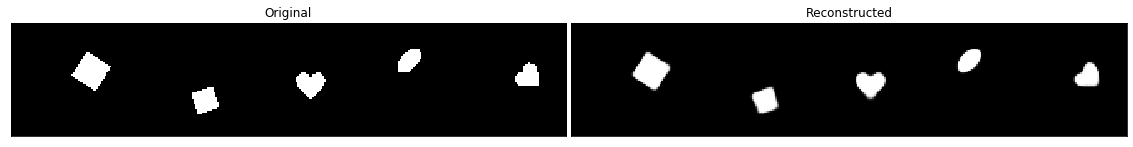

In [78]:
# vae b=0.5
vae05 = dsvae.VAE(latent_dim=LATENT_DIM)
vae05.load_weights(v[0])
display_model_random(vae05, test)

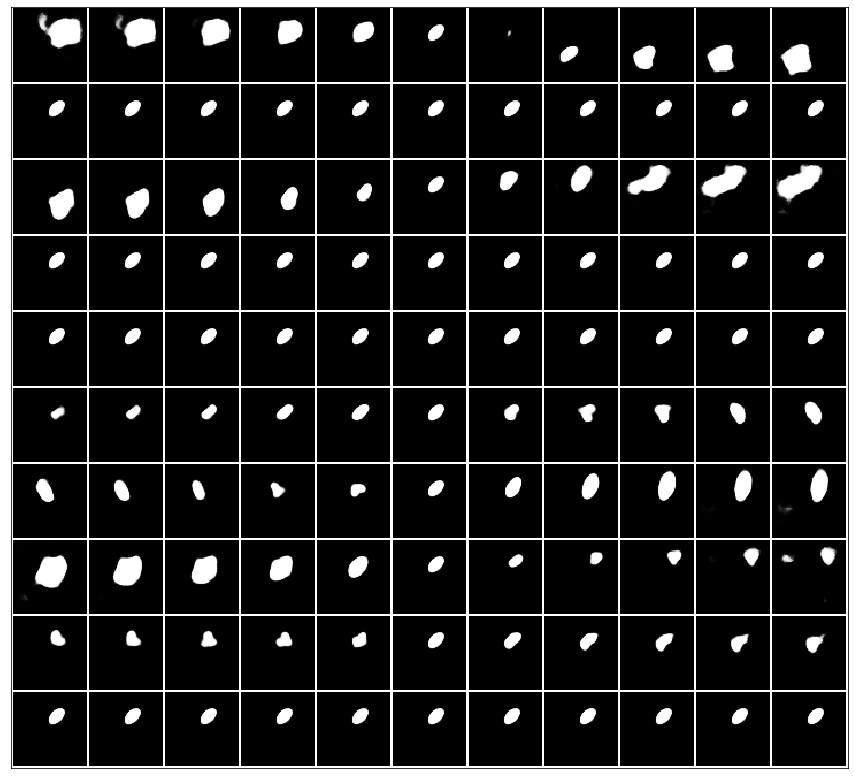

In [128]:
qual_latent_analysis(x, vae05)

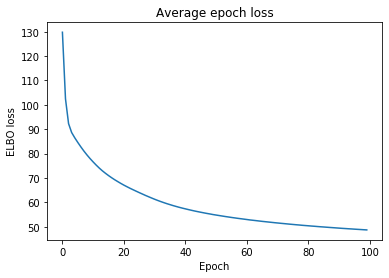

In [80]:
## vae b=0.5
l1 = np.loadtxt(vl[1])
plot_losses(l1)

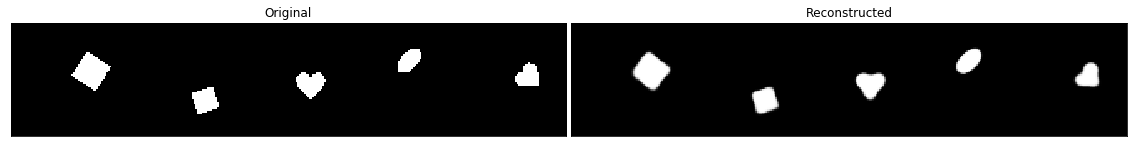

In [81]:
# vae b=1
vae1 = dsvae.VAE(latent_dim=LATENT_DIM)
vae1.load_weights(v[1])
display_model_random(vae1, test)

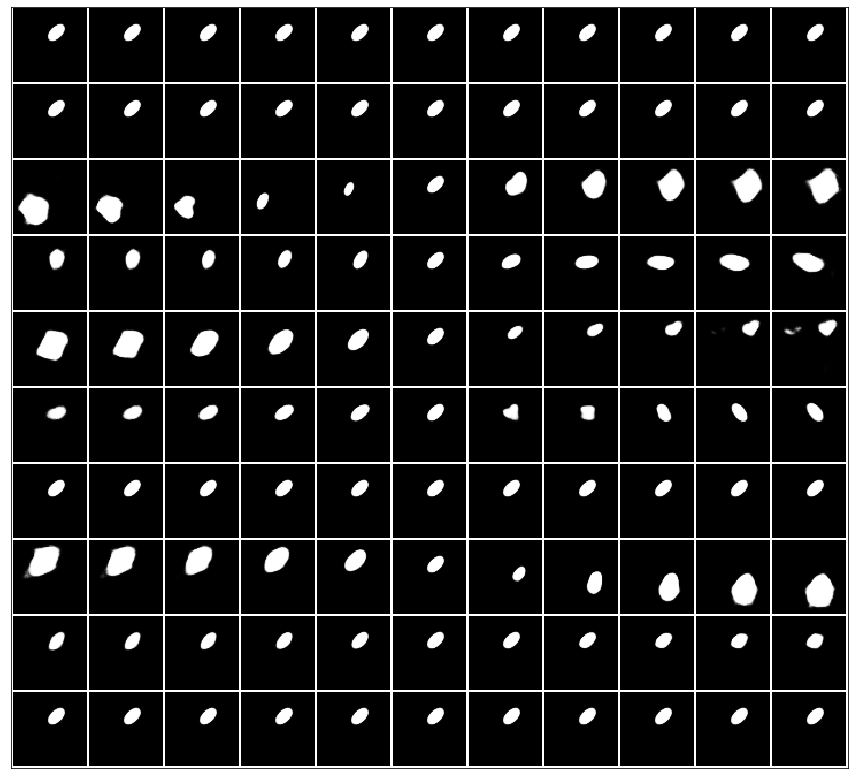

In [129]:
qual_latent_analysis(x, vae1)

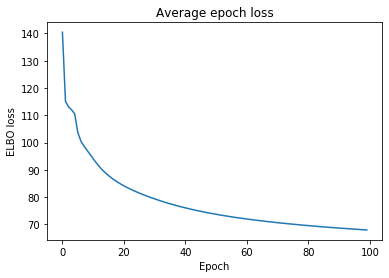

In [83]:
## vae b=2
l2 = np.loadtxt(vl[2])
plot_losses(l2)

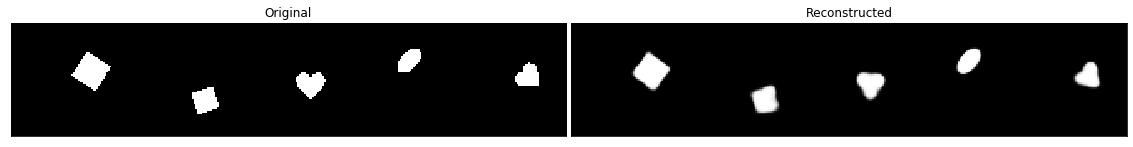

In [84]:
# vae b=2
vae2 = dsvae.VAE(latent_dim=LATENT_DIM)
vae2.load_weights(v[2])
display_model_random(vae2, test)

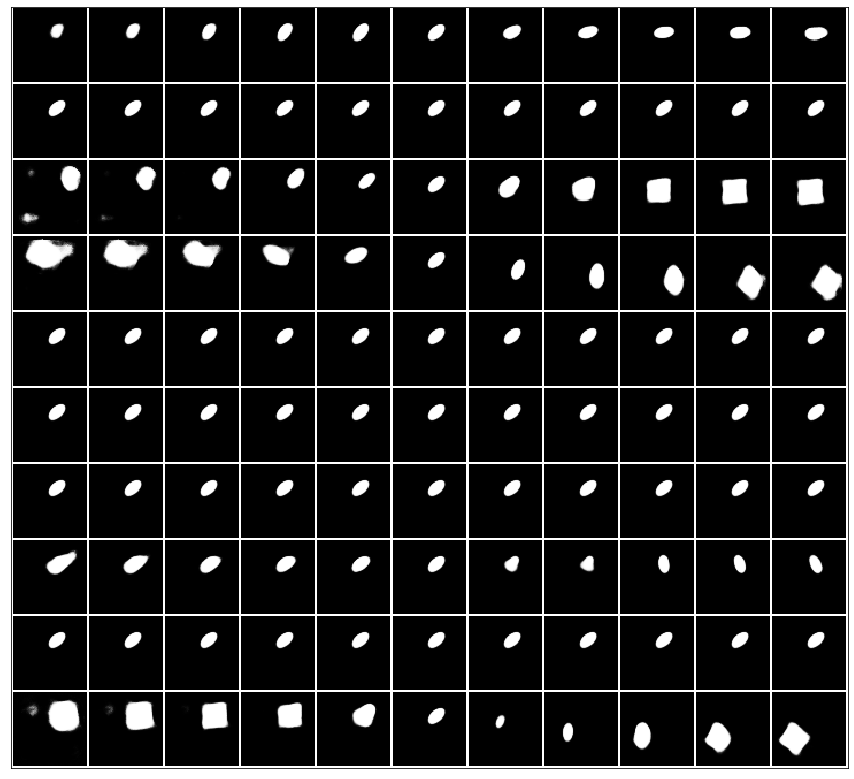

In [130]:
qual_latent_analysis(x, vae2)

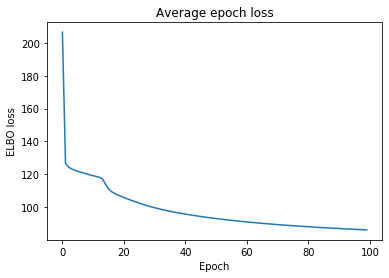

In [86]:
## vae b=3
l3 = np.loadtxt(vl[3])
plot_losses(l3)

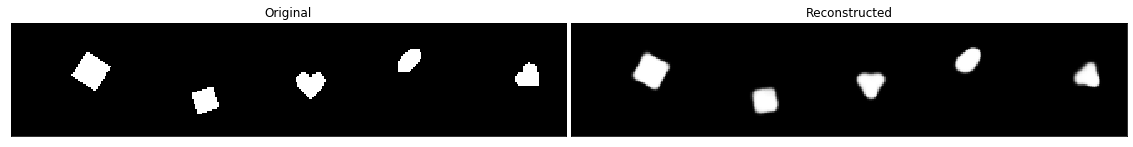

In [87]:
# vae b=3
vae3 = dsvae.VAE(latent_dim=LATENT_DIM)
vae3.load_weights(v[3])
display_model_random(vae3, test)

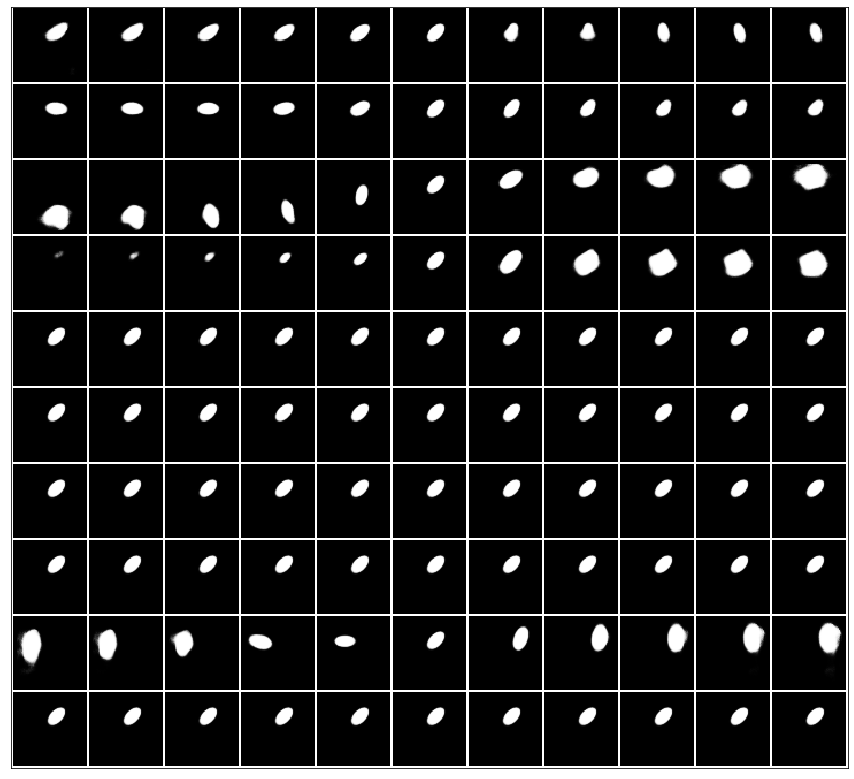

In [131]:
qual_latent_analysis(x, vae3)

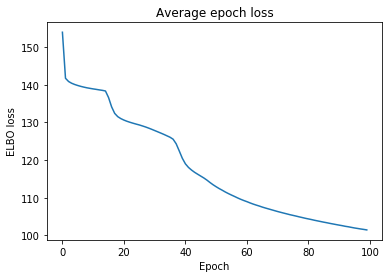

In [89]:
## vae b=4
l4 = np.loadtxt(vl[4])
plot_losses(l4)

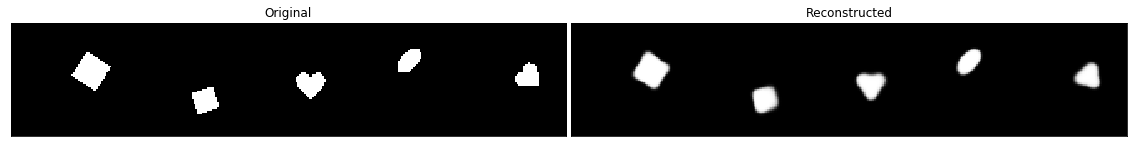

In [90]:
# vae b=4
vae4 = dsvae.VAE(latent_dim=LATENT_DIM)
vae4.load_weights(v[4])
display_model_random(vae4, test)

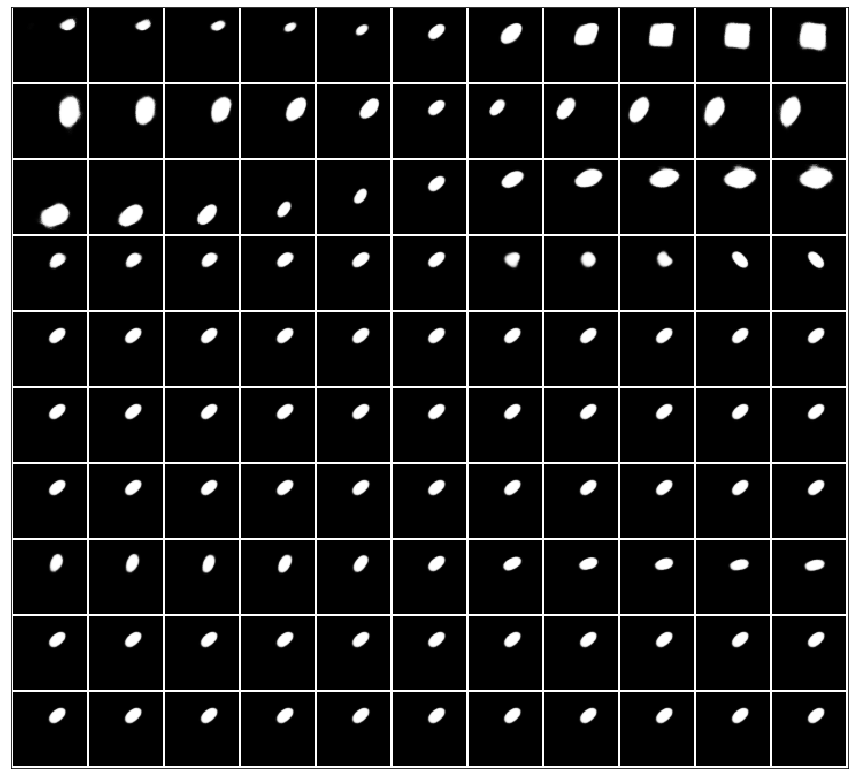

In [132]:
qual_latent_analysis(x, vae4)

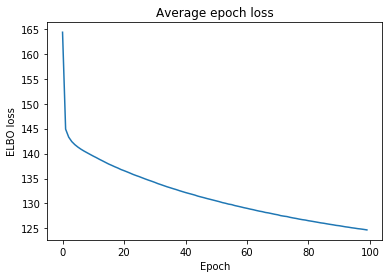

In [92]:
## vae b=5
l5 = np.loadtxt(vl[5])
plot_losses(l5)

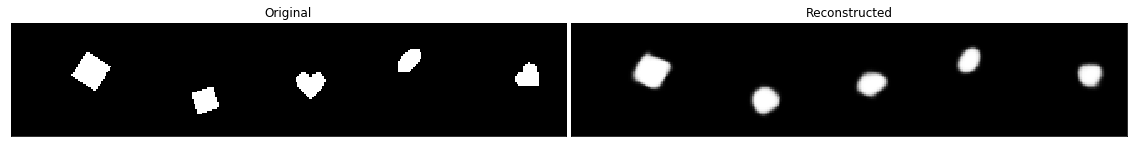

In [93]:
# vae b=5
vae5 = dsvae.VAE(latent_dim=LATENT_DIM)
vae5.load_weights(v[5])
display_model_random(vae5, test)

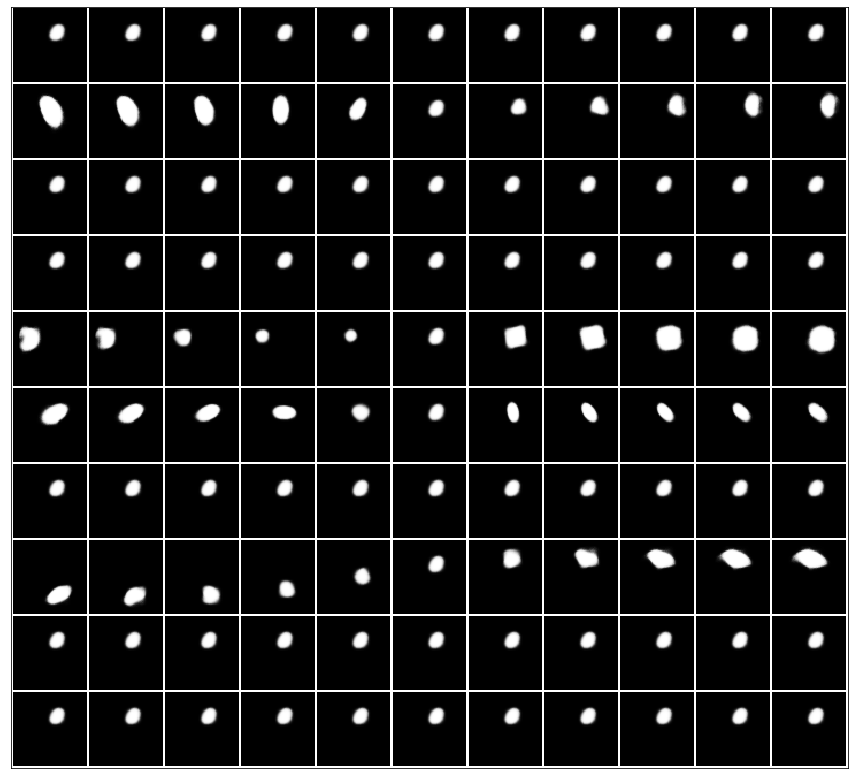

In [133]:
qual_latent_analysis(x, vae5)

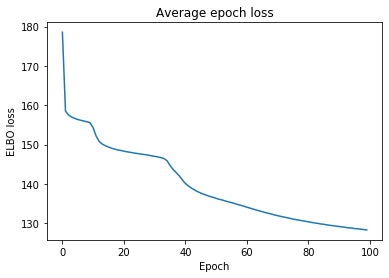

In [95]:
## vae b=6
l6 = np.loadtxt(vl[6])
plot_losses(l6)

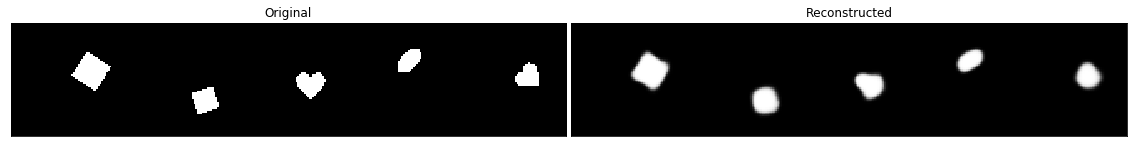

In [96]:
# vae b=6
vae6 = dsvae.VAE(latent_dim=LATENT_DIM)
vae6.load_weights(v[6])
display_model_random(vae6, test)

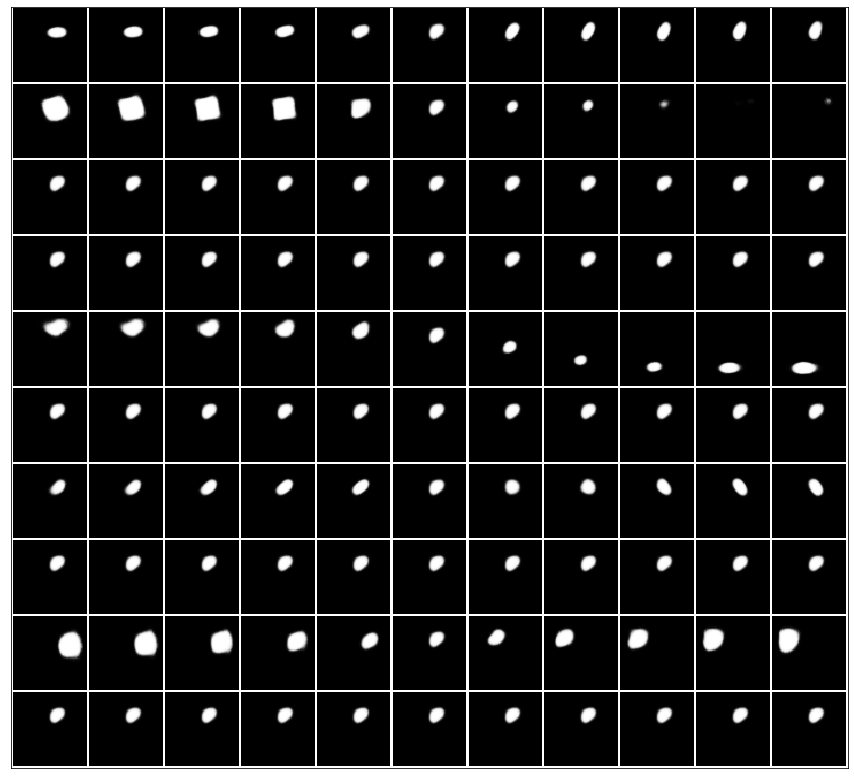

In [134]:
qual_latent_analysis(x, vae6)

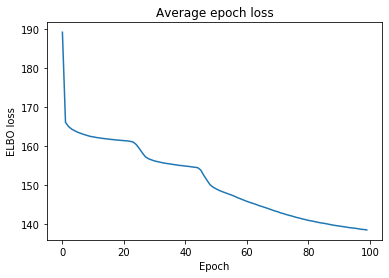

In [98]:
## vae b=7
l7 = np.loadtxt(vl[7])
plot_losses(l7)

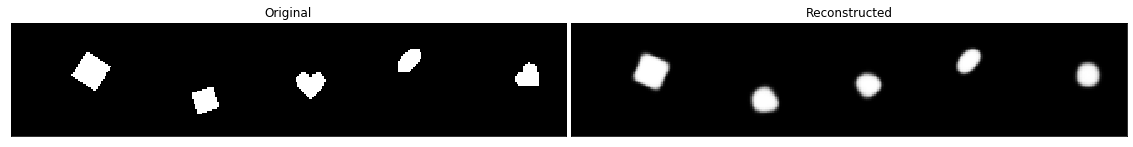

In [99]:
# vae b=7
vae7 = dsvae.VAE(latent_dim=LATENT_DIM)
vae7.load_weights(v[7])
display_model_random(vae7, test)

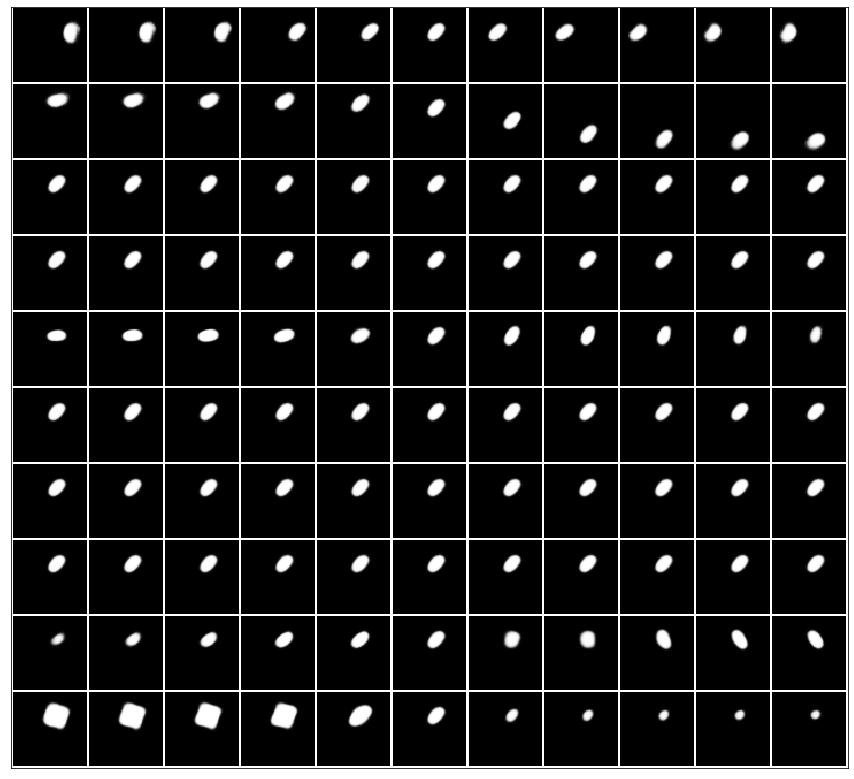

In [135]:
qual_latent_analysis(x, vae7)

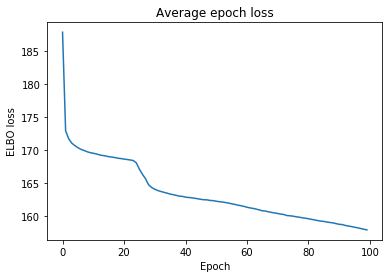

In [101]:
## vae b=8
l8 = np.loadtxt(vl[8])
plot_losses(l8)

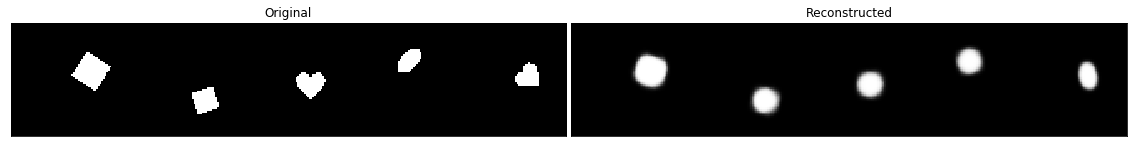

In [102]:
# vae b=8
vae8 = dsvae.VAE(latent_dim=LATENT_DIM)
vae8.load_weights(v[8])
display_model_random(vae8, test)

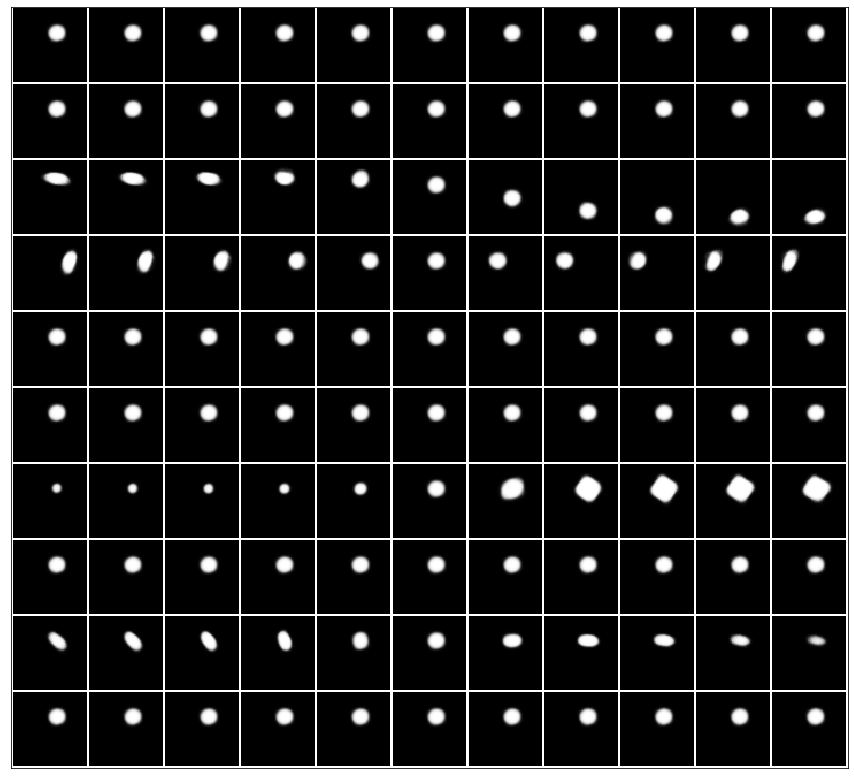

In [136]:
qual_latent_analysis(x, vae8)

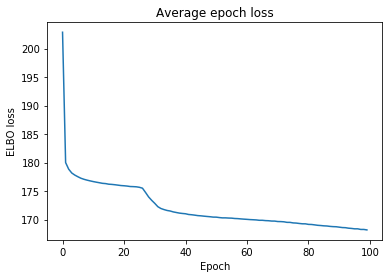

In [104]:
## vae b=9
l9 = np.loadtxt(vl[9])
plot_losses(l9)

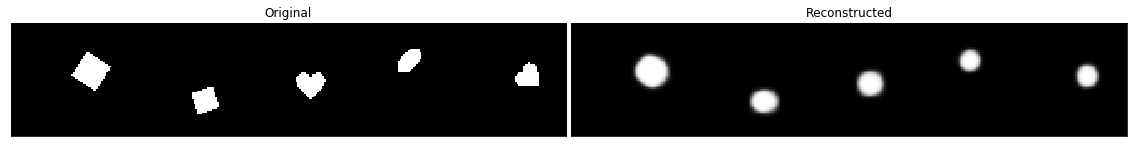

In [105]:
# vae b=9
vae9 = dsvae.VAE(latent_dim=LATENT_DIM)
vae9.load_weights(v[9])
display_model_random(vae9, test)

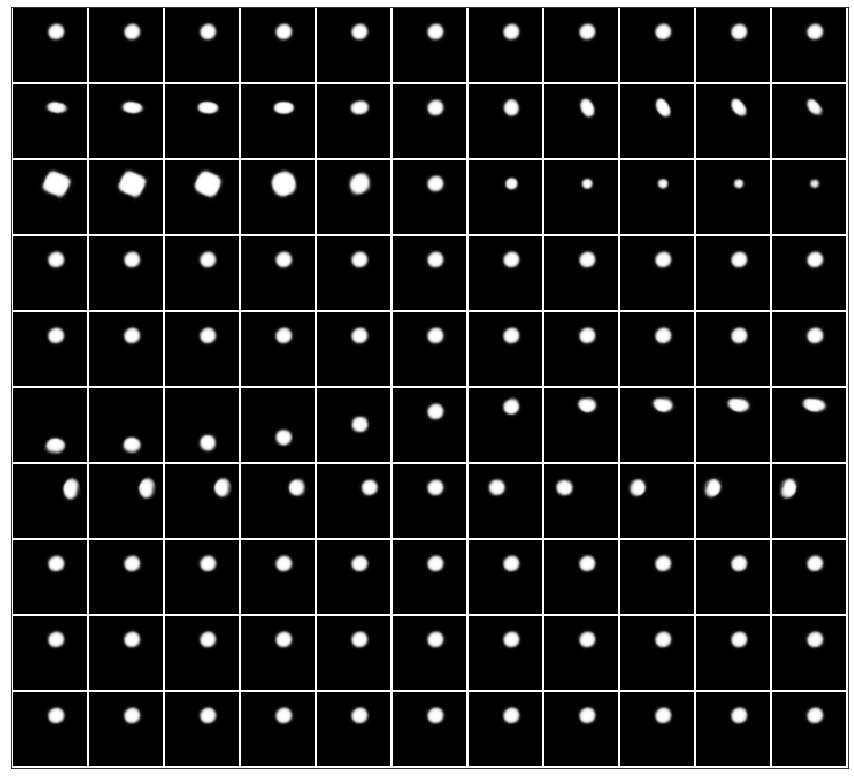

In [137]:
qual_latent_analysis(x, vae9)

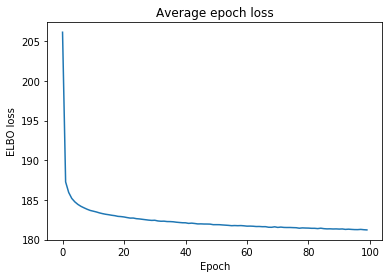

In [107]:
## vae b=10
l10 = np.loadtxt(vl[10])
plot_losses(l10)

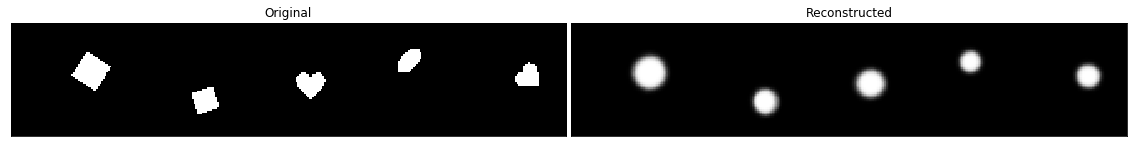

In [108]:
# vae b=10
vae10 = dsvae.VAE(latent_dim=LATENT_DIM)
vae10.load_weights(v[10])
display_model_random(vae10, test)

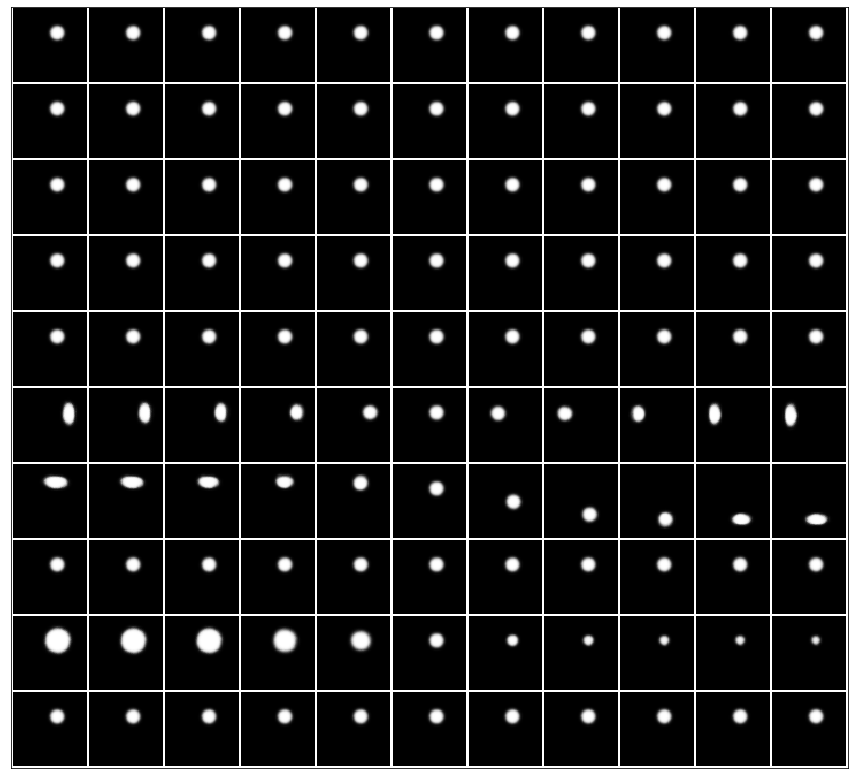

In [138]:
qual_latent_analysis(x, vae10)